<a href="https://colab.research.google.com/github/MattThomas95/Computer_Science_Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import statsmodels.api as sm
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from IPython.display import HTML, display
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import datetime
from datetime import date
from datetime import timedelta

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#         Tennessee COVID-19 Forecaster

In [ ]:
csv_url = "https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD"
fields = ['submission_date', 'state', 'tot_cases', 'tot_death']

csv_full_dataset = pd.read_csv(csv_url, usecols=fields)
csv_full_dataset = csv_full_dataset[csv_full_dataset['state'] =='TN']
csv_full_dataset = csv_full_dataset.drop(csv_full_dataset.columns[1], axis=1)


csv_full_dataset['submission_date'] = pd.to_datetime(csv_full_dataset.submission_date)
csv_full_dataset = csv_full_dataset.sort_values(by=['submission_date'])

dataset = csv_full_dataset.drop(csv_full_dataset.columns[2], axis=1)
death_dataset = csv_full_dataset.drop(csv_full_dataset.columns[1], axis=1)

In [ ]:
dataset

,submission_date,tot_cases
15788,2020-01-22,0
13328,2020-01-23,0
21363,2020-01-24,0
4368,2020-01-25,0
7394,2020-01-26,0
...,...,...
18192,2021-02-03,733216
13731,2021-02-04,736370
4962,2021-02-05,739031
11231,2021-02-06,742213


In [ ]:
death_dataset

,submission_date,tot_death
15788,2020-01-22,0
13328,2020-01-23,0
21363,2020-01-24,0
4368,2020-01-25,0
7394,2020-01-26,0
...,...,...
18192,2021-02-03,10033
13731,2021-02-04,10202
4962,2021-02-05,10405
11231,2021-02-06,10463


In [ ]:
csv_full_dataset.index = pd.DatetimeIndex(csv_full_dataset['submission_date'], freq='D')
csv_full_dataset = csv_full_dataset.drop(csv_full_dataset.columns[0], axis=1)

dataset.index = pd.DatetimeIndex(dataset['submission_date'], freq='D')
dataset = dataset.drop(dataset.columns[0], axis=1)

death_dataset.index = pd.DatetimeIndex(death_dataset['submission_date'], freq='D')
death_dataset = death_dataset.drop(death_dataset.columns[0], axis=1)

In [ ]:
csv_full_dataset

,tot_cases,tot_death
submission_date,,
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2021-02-03,733216,10033
2021-02-04,736370,10202
2021-02-05,739031,10405


#### These graphs show the number of cases and deaths in Tennessee

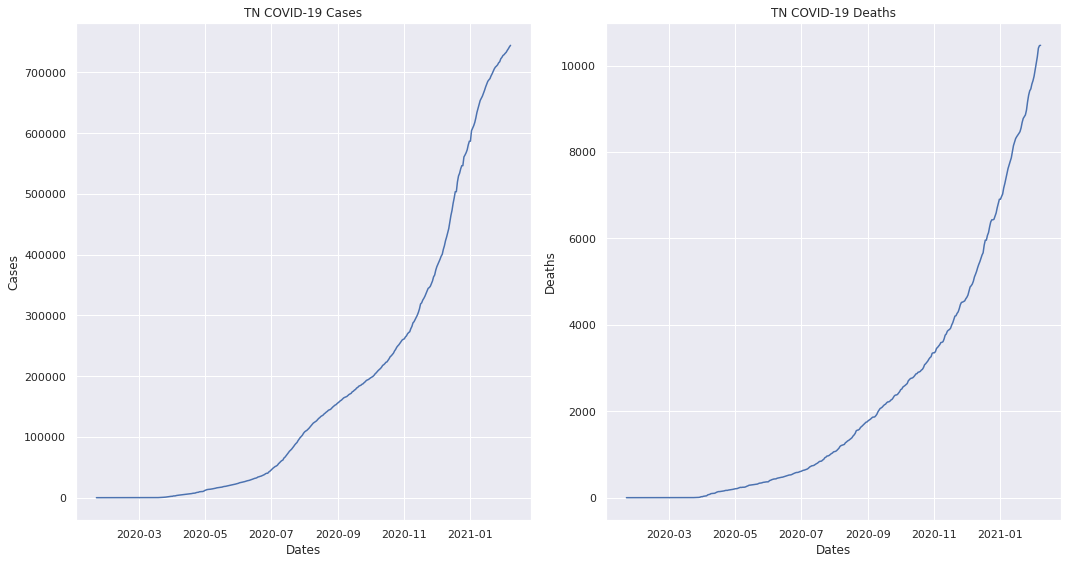

In [ ]:
sns.set()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
axes[0].plot(dataset);
axes[0].set(title="TN COVID-19 Cases",
      xlabel="Dates",
      ylabel="Cases")

axes[1].plot(death_dataset)
axes[1].set(title="TN COVID-19 Deaths",
      xlabel="Dates",
      ylabel="Deaths")
fig.tight_layout()

fig.savefig('gtest.png', bbox_inches='tight')

In [ ]:
y = dataset
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
# print(results.summary().tables[1])

In [ ]:
z = death_dataset
mod = sm.tsa.statespace.SARIMAX(z,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
death_results = mod.fit()

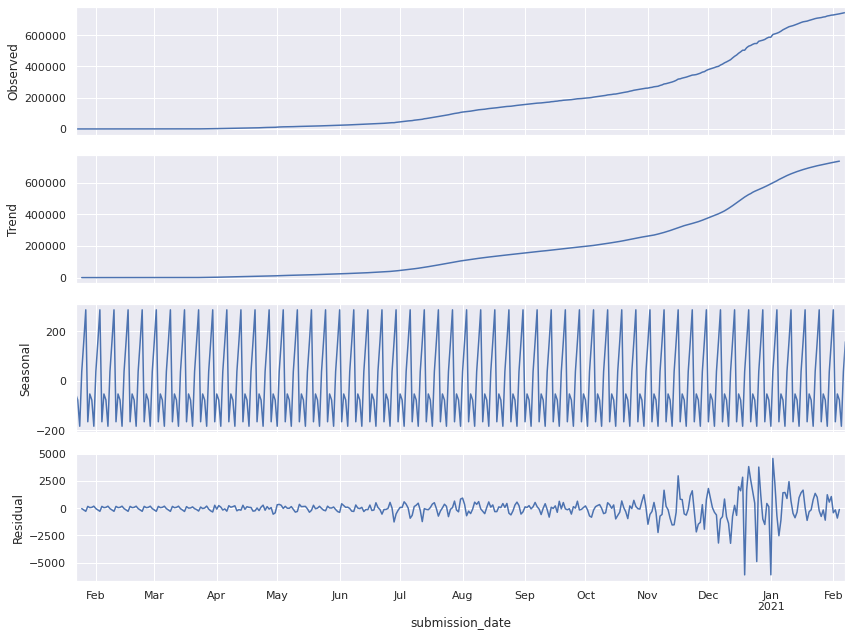

In [ ]:
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

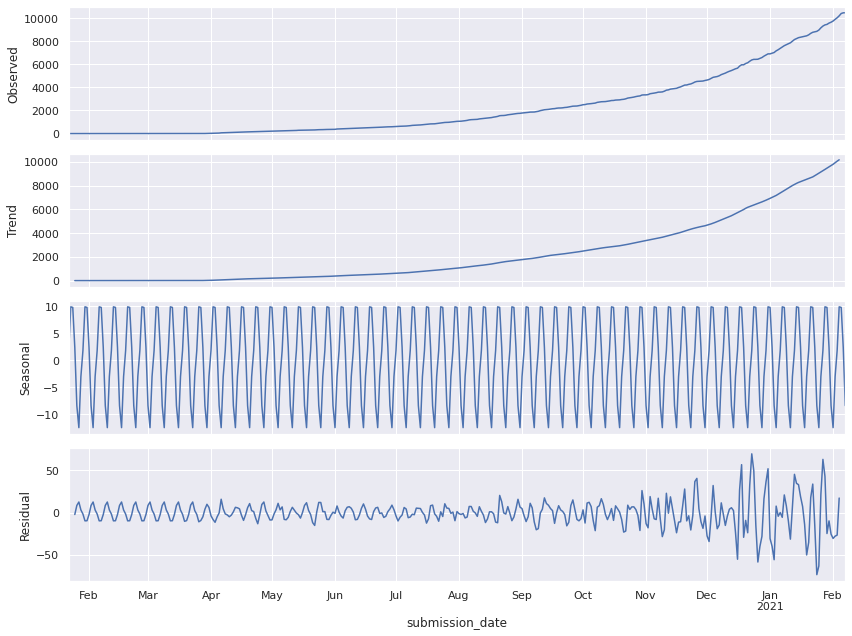

In [ ]:
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(z, model='additive')
fig = decomposition.plot()
plt.show()

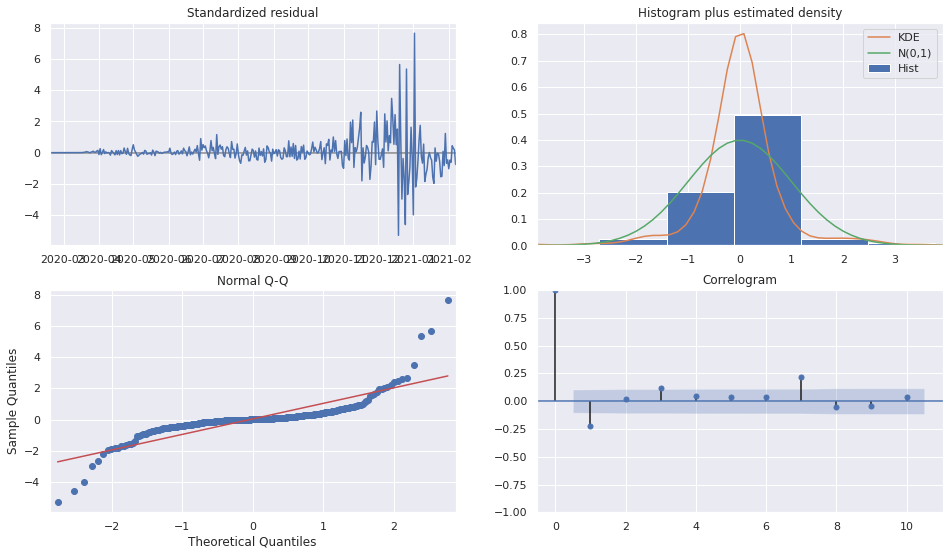

In [ ]:
results.plot_diagnostics(figsize=(16, 9))
plt.show()

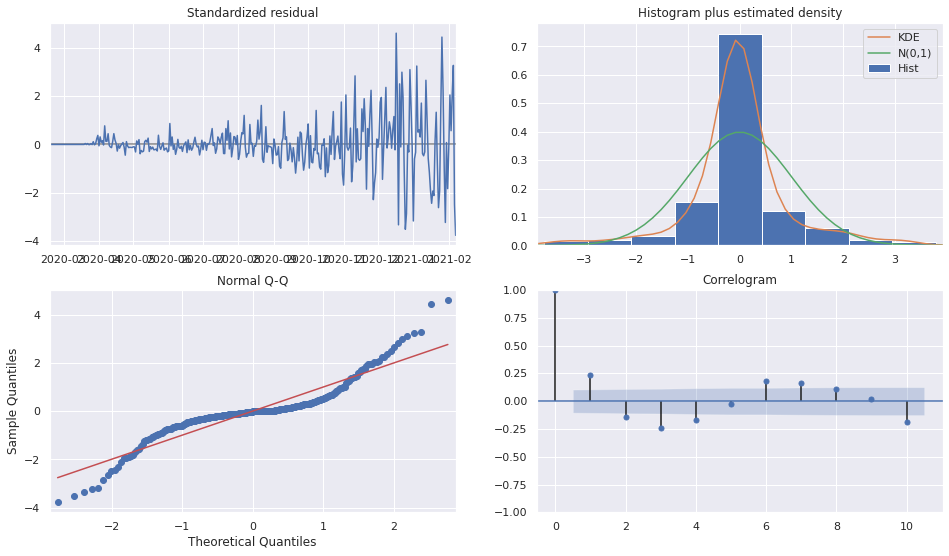

In [ ]:
death_results.plot_diagnostics(figsize=(16, 9))
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(dataset['tot_cases'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.129246
p-value                          0.946446
#Lags Used                      13.000000
Number of Observations Used    369.000000
Critical Value (1%)             -3.448197
Critical Value (5%)             -2.869405
Critical Value (10%)            -2.570960
dtype: float64


In [ ]:
# Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(death_dataset['tot_death'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   5.265810
p-value                          1.000000
#Lags Used                      14.000000
Number of Observations Used    368.000000
Critical Value (1%)             -3.448245
Critical Value (5%)             -2.869426
Critical Value (10%)            -2.570971
dtype: float64


            lower tot_cases  upper tot_cases
2021-02-08    744270.089391     7.504207e+05
2021-02-09    745151.038866     7.545916e+05
2021-02-10    746208.648557     7.586900e+05
2021-02-11    747216.023566     7.626972e+05
2021-02-12    748849.486175     7.673582e+05
...                     ...              ...
2021-07-03    716829.716560     1.584923e+06
2021-07-04    715858.300692     1.591609e+06
2021-07-05    714655.760450     1.598076e+06
2021-07-06    714100.034935     1.605200e+06
2021-07-07    712905.153149     1.611696e+06

[150 rows x 2 columns]


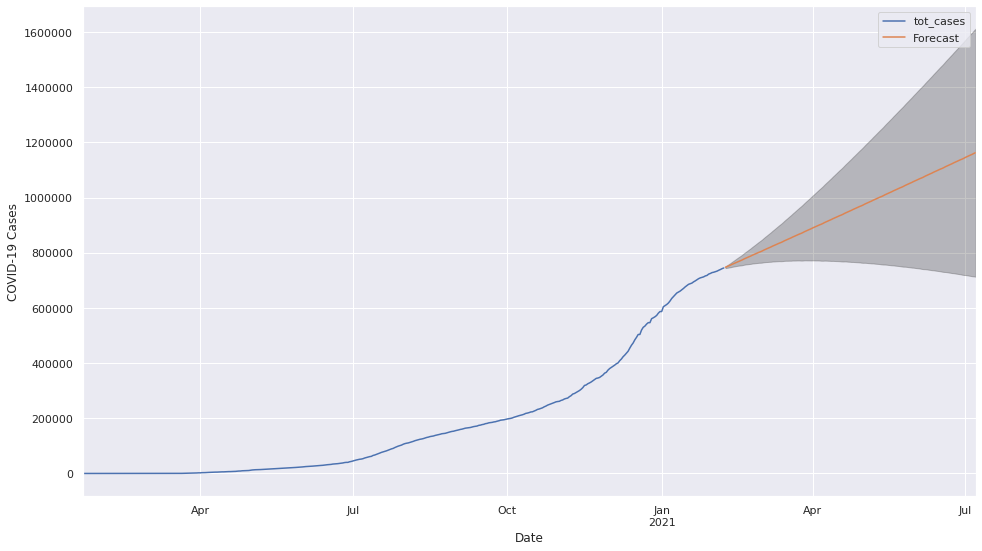

In [ ]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

pred = results.get_forecast(steps=150)

pred_ci = pred.conf_int()

print(pred_ci)

ax = y.plot(label='observed', figsize=(16, 9), use_index=True)
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 Cases')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.legend()
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


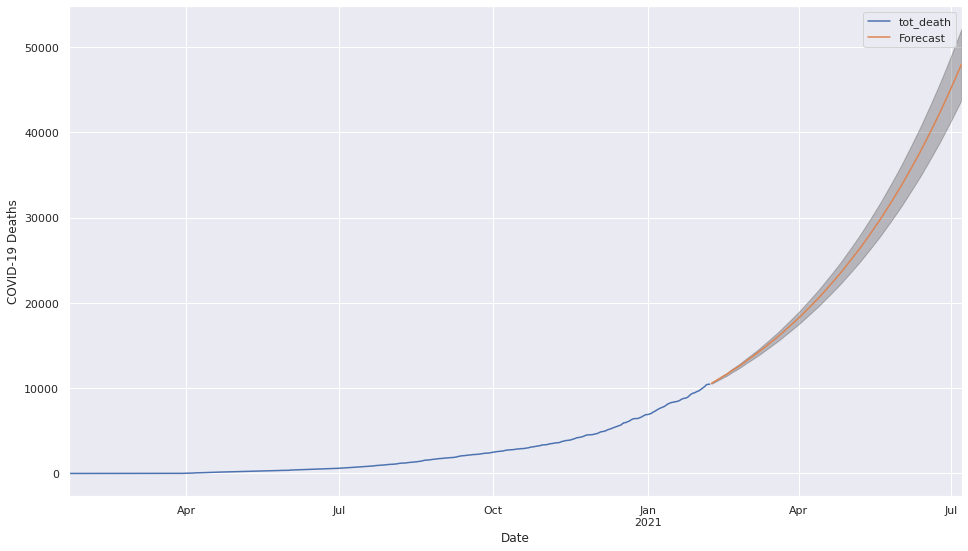

In [ ]:
pred = death_results.get_forecast(steps=150)

pred_ci = pred.conf_int()

ax = z.plot(label='observed', figsize=(16, 9))
print(ax)
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 Deaths')
plt.legend()
plt.show();

In [ ]:
forecast = results.forecast(400)

forecastDf = pd.DataFrame(forecast)

In [ ]:
death_forecast = death_results.forecast(400)

death_forecastDf = pd.DataFrame(death_forecast)

In [ ]:
# forecastDf

In [ ]:
# forecastDf.loc['2021-07-06 00:00:00']

In [ ]:
# forecastDf

In [ ]:
# guess todays cases
today = pd.to_datetime('today').normalize()

p_today = round(forecastDf.loc[today][0])

print(f'The estimated total cases of COVID-19 in '
      f'Tennessee today is..{p_today}')

The estimated total cases of COVID-19 in Tennessee today is..749871


In [ ]:
# guess todays deaths
today = pd.to_datetime('today').normalize()

p_today = round(death_forecastDf.loc[today][0])

print(f'The estimated total deaths from COVID-19 in '
      f'Tennessee today is..{p_today}')

The estimated total deaths from COVID-19 in Tennessee today is..10685


In [ ]:
# guess next weeks cases
today = pd.to_datetime('today').normalize()

week = today + timedelta(days=7)

p_week = round(forecastDf.loc[week][0])

print(f'The estimated total cases of COVID-19 in '
      f'Tennessee next week is..{p_week}')

The estimated total cases of COVID-19 in Tennessee next week is..768857


In [ ]:
# guess next weeks deaths
today = pd.to_datetime('today').normalize()

week = today + timedelta(days=7)

p_week = round(death_forecastDf.loc[week][0])

print(f'The estimated total deaths from COVID-19 in '
      f'Tennessee next week is..{p_week}')

The estimated total deaths from COVID-19 in Tennessee next week is..11503


In [ ]:
# guess next months cases
today = pd.to_datetime('today').normalize()

month = today + timedelta(days=30)

p_month = round(forecastDf.loc[month][0])

print(f'The estimated total cases of COVID-19 in '
      f'Tennessee next month is..{p_month}')

The estimated total cases of COVID-19 in Tennessee next month is..831699


In [ ]:
# guess next months deaths
today = pd.to_datetime('today').normalize()

month = today + timedelta(days=30)

p_month = round(death_forecastDf.loc[month][0])

print(f'The estimated total deaths from COVID-19 in '
      f'Tennessee next month is..{p_month}')

The estimated total deaths from COVID-19 in Tennessee next month is..14686


In [ ]:
# guess 3 months cases
today = pd.to_datetime('today').normalize()

three_month = today + timedelta(days=90)

p_three_month = round(forecastDf.loc[three_month][0])

print(f'The estimated total cases of COVID-19 in '
      f'Tennessee next month is..{p_three_month}')

The estimated total cases of COVID-19 in Tennessee next month is..998430


In [ ]:
# guess 3 months deaths
today = pd.to_datetime('today').normalize()

three_month = today + timedelta(days=90)

p_three_month = round(death_forecastDf.loc[three_month][0])

print(f'The estimated total deaths from COVID-19 in '
      f'Tennessee next month is..{p_three_month}')

The estimated total deaths from COVID-19 in Tennessee next month is..27094


In [ ]:
# guess 6 months cases
today = pd.to_datetime('today').normalize()

six_month = today + timedelta(days=180)

p_six_month = round(forecastDf.loc[six_month][0])

print(f'The estimated total cases of COVID-19 in '
      f'Tennessee next month is..{p_six_month}')

The estimated total cases of COVID-19 in Tennessee next month is..1253430


In [ ]:
# guess 6 months deaths
today = pd.to_datetime('today').normalize()

six_month = today + timedelta(days=180)

p_six_month = round(death_forecastDf.loc[six_month][0])

print(f'The estimated total deaths from COVID-19 in '
      f'Tennessee next month is..{p_six_month}')

The estimated total deaths from COVID-19 in Tennessee next month is..65467


In [ ]:
# guess year cases
today = pd.to_datetime('today').normalize()

year = today + timedelta(days=365)

p_year = round(forecastDf.loc[year][0])

print(f'The estimated total cases of COVID-19 in '
      f'Tennessee next year is..{p_year}')

The estimated total cases of COVID-19 in Tennessee next year is..1785671


In [ ]:
# guess year deaths
today = pd.to_datetime('today').normalize()

year = today + timedelta(days=365)

p_year = round(death_forecastDf.loc[year][0])

print(f'The estimated total deaths from COVID-19 in '
      f'Tennessee next year is..{p_year}')

The estimated total deaths from COVID-19 in Tennessee next year is..376927


In [ ]:
# forcast_cases = pd.DataFrame([p_today, p_week_out, p_month, p_three_month, p_six_month, p_year])

In [ ]:
# forcast_cases

In [ ]:
# plot = results.get_prediction(start='2020-08-08', end='2020-12-08')

# plot.predicted_mean

# pred_uc_ci = plot.conf_int(alpha=0.05)

# pred_uc_ci

In [ ]:
# dataset

In [ ]:
!pip install anvil-uplink

In [ ]:
import anvil.server

anvil.server.connect('B3SFXC4ZYK5IPUQYN6HIVZXT-BR2UQIAYA7WD4P4I')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [ ]:
@anvil.server.callable
def read_csv(csv_string):
    # Turn the string into a list for csv_reader.
    csv_list=csv_string.split()
    # Create csv reader instance
    cr=csv.reader(csv_list)
    for csv_line in cr:
        # Each field is [0],[1], etc.
        print(csv_line[0])

In [ ]:
import anvil.tables as tables
from anvil.tables import app_tables

def import_csv_data(file):
  with open(file, "r") as f:
    df = pd.read_csv(f)
    for d in df.to_dict(orient="records"):
      # d is now a dict of {columnname -> value} for this row
      # We use Python's **kwargs syntax to pass the whole dict as
      # keyword arguments
      app_tables.cases.add_row(**d)

In [ ]:
@anvil.server.callable
def get_data():
  return app_tables.cases.search()

In [ ]:
@anvil.server.callable
def pc_date(date):
    # guess todays cases
    date = date.strftime("%m/%d/%Y")
    p_today = round(forecastDf.loc[date][0])
    
    return p_today

In [ ]:
@anvil.server.callable
def pd_date(date):
    # guess todays deaths
    date = date.strftime("%m/%d/%Y")
    p_today = round(death_forecastDf.loc[date][0])
    
    return p_today

In [ ]:
@anvil.server.callable
def get_cases_data():
  csv_url = "https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD"
  fields = ['submission_date', 'state', 'tot_cases', 'tot_death']

  csv_full_dataset = pd.read_csv(csv_url, usecols=fields)
  csv_full_dataset = csv_full_dataset[csv_full_dataset['state'] =='TN']
  csv_full_dataset = csv_full_dataset.drop(csv_full_dataset.columns[1], axis=1)


  csv_full_dataset['submission_date'] = pd.to_datetime(csv_full_dataset.submission_date)
  csv_full_dataset = csv_full_dataset.sort_values(by=['submission_date'])

  df = pd.DataFrame(csv_full_dataset)
  x = df['tot_cases'].tolist()
  y = df['submission_date'].tolist()
  return x,y

In [ ]:
@anvil.server.callable
def get_death_data():
  csv_url = "https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD"
  fields = ['submission_date', 'state', 'tot_cases', 'tot_death']

  csv_full_dataset = pd.read_csv(csv_url, usecols=fields)
  csv_full_dataset = csv_full_dataset[csv_full_dataset['state'] =='TN']
  csv_full_dataset = csv_full_dataset.drop(csv_full_dataset.columns[1], axis=1)


  csv_full_dataset['submission_date'] = pd.to_datetime(csv_full_dataset.submission_date)
  csv_full_dataset = csv_full_dataset.sort_values(by=['submission_date'])

  df = pd.DataFrame(csv_full_dataset)
  x = df['tot_death'].tolist()
  y = df['submission_date'].tolist()
  return x,y

In [ ]:
@anvil.server.callable
def get_csv():
  csv_url = "https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD"
  fields = ['submission_date', 'state', 'tot_cases', 'tot_death']

  csv_full_dataset = pd.read_csv(csv_url, usecols=fields)
  csv_full_dataset = csv_full_dataset[csv_full_dataset['state'] =='TN']
  csv_full_dataset = csv_full_dataset.drop(csv_full_dataset.columns[1], axis=1)

  csv_full_dataset['submission_date'] = pd.to_datetime(csv_full_dataset.submission_date)
  csv_full_dataset = csv_full_dataset.sort_values(by=['submission_date'])

  csv_full_dataset['submission_date'] = csv_full_dataset['submission_date'].dt.date

  df = pd.DataFrame(csv_full_dataset)
  csv_full_dataset = csv_full_dataset.to_dict("records")
  return csv_full_dataset

In [ ]:
while True:pass

In [ ]:
anvil.server.wait_forever()